In [ ]:
# Caner Irfanoglu | A00425840 | Assignment2 | Question2
# For this assignment, I used the Aircraft Event Information from Canadian Open Data Portal
# Preprocessing is done in excel and both files included in submission
# Following questions are answered via using exploratory analysis
        # 1 - How does the number of aircraft events change over the years?
        # 2 - Which provinces are more prone to aircraft events ?
        # 3 - What are the top 10 events that are most observed?

In [52]:
import pandas as pd
import matplotlib.pyplot as plt
# Loading libraries

In [12]:
aircraft_raw_path = "/Users/Caner/Desktop/SMU_Class/Data_Mining_5580/sreejata/Assignment2/Aircraft_Event_Raw.csv"
aircraft_raw = pd.read_csv(aircraft_raw_path, encoding = 'latin-1')
# Raw dataset
# Downloaded From https://open.canada.ca/data/en/dataset/a348c1d1-2392-4595-b5e2-c6a244a7e87f

0.3592238426208496

In [14]:
aircraft_raw.head()

,CADORSNUMBER,AIRCRAFTNUMBER,EVENT_SEQ_NUM,EVENT_NAME_ENM,EVENT_NAME_FNM
0,2007P0035,448703,1,Bird strike,Impact d'oiseau
1,2007P0100,449191,1,Declared emergency/priority,Urgence dÌ©clarÌ©e/prioritÌ©
2,2007P0100,449191,2,Fuel - exhaustion,Carburant - panne sÌ¬che
3,2007P0100,449191,3,Diversion,DÌ©viation
4,2007P0146,449561,1,Conflict - potential,Conflit - potentiel


In [17]:
aircraft_path = "/Users/Caner/Desktop/SMU_Class/Data_Mining_5580/sreejata/Assignment2/Aircraft_Event_Preprocessed.csv"
aircraft_event = pd.read_csv(aircraft_path,encoding = 'latin-1')
# Preprocesed dataset 

In [ ]:
##### Data Preprocessing made in Excel #####  
# Actions Taken are as follows:
# 1- Drop the EVENT_NAME_FNM
# 2- Separate CADORSNUMBER to Year | Region_Short | Sequantial_No (See Aircraft_Meta)
# 3- From the Region Abbreviations regions are derived

In [18]:
aircraft_event.head()

,Year,Region_Short,Sequantial_No,Region,AIRCRAFTNUMBER,EVENT_SEQ_NUM,EVENT_NAME_ENM
0,2007,P,35,British Columbia,448703,1,Bird strike
1,2007,P,100,British Columbia,449191,1,Declared emergency/priority
2,2007,P,100,British Columbia,449191,2,Fuel - exhaustion
3,2007,P,100,British Columbia,449191,3,Diversion
4,2007,P,146,British Columbia,449561,1,Conflict - potential


In [20]:
aircraft_event.describe()
# Data Description

,Year,Sequantial_No,AIRCRAFTNUMBER,EVENT_SEQ_NUM
count,292488.000000,292488.000000,292488.000000,292488.000000
mean,2008.934678,1361.156123,401789.248827,1.515666
std,6.397335,1128.935534,250335.992167,0.792271
min,1986.000000,1.000000,1.000000,1.000000
25%,2005.000000,468.000000,91847.750000,1.000000
50%,2010.000000,1072.000000,508584.000000,1.000000
75%,2014.000000,2003.000000,606261.000000,2.000000
max,2019.000000,6050.000000,691814.000000,24.000000


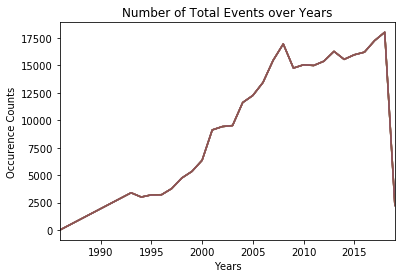

In [41]:
aircraft_event.groupby(['Year']).count().plot()
plt.title("Number of Total Events over Years")
plt.xlabel("Years")
plt.ylabel("Occurence Counts")
plt.legend().remove()
plt.show()
# Plot total events over the years

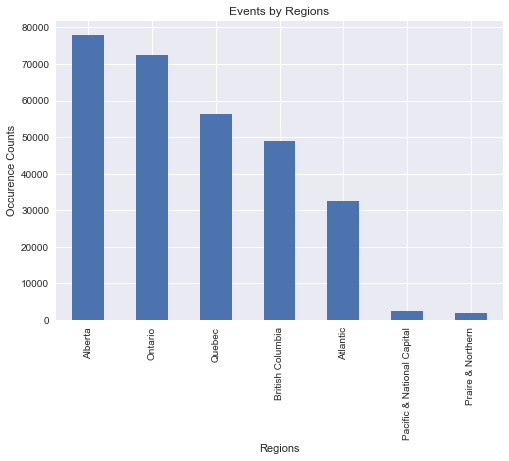

In [122]:
d = {'Region':aircraft_event.Region.unique(), 'Counts':aircraft_event.groupby("Region")["Region"].transform('count').unique()}
df = pd.DataFrame(data=d).sort_values('Counts', ascending = False)
df.plot.bar(x='Region',y="Counts")
plt.title("Events by Regions")
plt.xlabel("Regions")
plt.ylabel("Occurence Counts")
plt.legend().remove()
plt.show()
# Plot distribution of events by regions

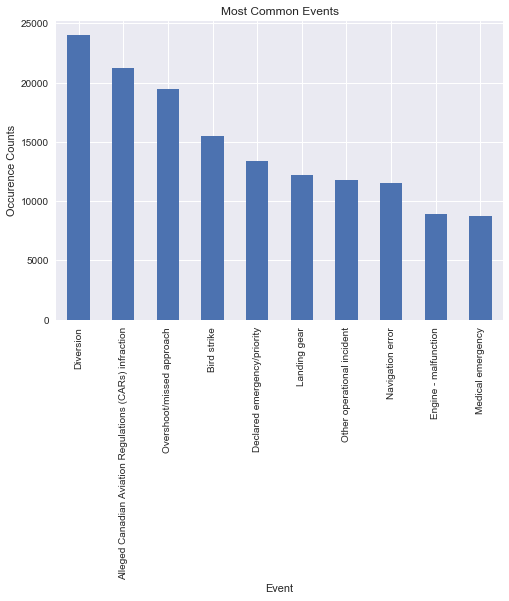

In [118]:
df = aircraft_event.groupby(['EVENT_NAME_ENM']).count().sort_values('EVENT_SEQ_NUM',ascending=False).head(10)
df.plot.bar(x=df.index,y="Region")
plt.title("Most Common Events")
plt.xlabel("Event")
plt.ylabel("Occurence Counts")
plt.legend().remove()
plt.show()
